# Common Setup

In [2]:
import numpy as np
import os

In [3]:
np.random.seed(42)

In [4]:
#Plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

In [5]:
# Save figures
PROJECT_ROOT_DIR="."
CHAPTER_ID="classification"

In [6]:
def save_fig(fig_id,tight_layout=True):
    path=os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving Figure", fig_id)
    if tight_layout:
        plt.tight_layout()
        plt.savefig(path,format='png',dpi=300)        

# MNIST

In [7]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target,i) for i, target in enumerate(mnist.target[:60000])]))[:,1]
    reorder_test = np.array(sorted([(target,i) for i, target in enumerate(mnist.target[60000:])]))[:,1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]    

In [8]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache = True)

In [9]:
mnist.target=mnist.target.astype(np.int8) #fetch openml() returns target as String
sort_by_target(mnist)
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [10]:
mnist.data.shape

(70000, 784)

In [11]:
X,y = mnist["data"],mnist["target"]
X.shape

(70000, 784)

In [12]:
y.shape

(70000,)

In [13]:
28*28

784

In [14]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

Saving Figure some_digit_plot


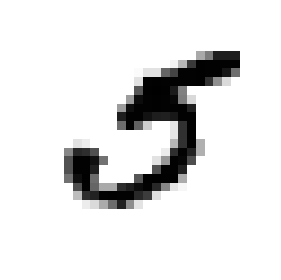

In [15]:
plt.imshow(some_digit_image, cmap=mpl.cm.binary,
          interpolation="nearest")
plt.axis("off")
save_fig("some_digit_plot")
plt.show()

Let's define a method to do this

In [16]:
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image, cmap=mpl.cm.binary,
              interpolation = "nearest")
    plt.axis("off")

In [17]:
def plot_digits(instances,images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances),images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances)-1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis = 1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")
        

Saving Figure more_digits_plot


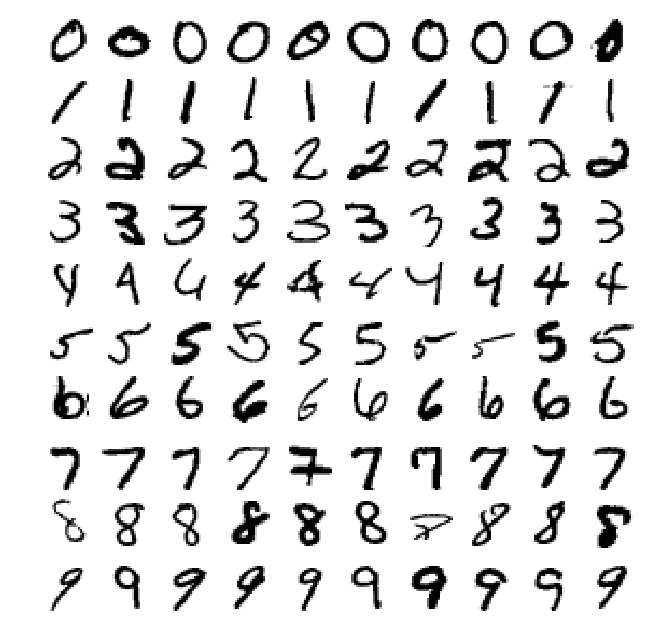

In [18]:
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600],X[13000:30600:600],X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

More details on understanding above code can be found here - https://github.com/ageron/handson-ml/issues/374

In [19]:
y[36000]

5

In this dataset, already the data is split into training set (first 60000 images) and testing set (the last 10000 images).

In [20]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

Let's shuffle the indices in the training set, to ensure there are no similar digits in a row.

In [21]:
import numpy as np
shuffle_index=np.random.permutation(60000)
X_train,y_train = X_train[shuffle_index], y_train[shuffle_index]

# Training a Binary Classifier

In [22]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [23]:
from sklearn.linear_model import SGDClassifier

In [24]:
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

To remove the above warning, let's add the max_iter and tol parameters in the above code

In [25]:
sgd_clf=SGDClassifier(max_iter=5, tol = -np.infty, random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
sgd_clf.predict([some_digit])

array([ True])

# Performance Measures

### Measuring Accuracy Using Cross-Validation

In [27]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.9502 , 0.96565, 0.96495])

In [28]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [29]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

In [30]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_folds = X_train[test_index]
    y_test_folds = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred))

0.9502
0.96565
0.96495


This has above 95% accuracy, let's write a dumb classifier that just classifies every sigle digit as not-5.

In [31]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1),dtype=bool)

In [32]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring = "accuracy")

array([0.909  , 0.90715, 0.9128 ])

Even this has 90% accuracy. This shows why Accuracy is not a preferred performance measure in classifiers espeacially in skewed data sets.

### Confusion Matrix

To compute confusion matrix, we need a set of predictions, so they can be compared to a set of actual targets.

In [33]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5, cv=3)

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]], dtype=int64)

A perfect classifier would be like this, it would have only trye positives and true negatives.

In [35]:
y_train_perfect_predictions = y_train_5

In [36]:
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]], dtype=int64)

### Precision and Recall

precision = TP/TP+FP

In [37]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred)

0.7687135020350381

recall = TP/TP+FN

In [38]:
recall_score(y_train_5,y_train_pred)

0.801328168234643

Now, we can see it is correct only 77% of the time (not as good as when we checked accuracy). It only detects 80% of the 5s in this case.

We can combine precision and recall into a single metric called F1 score.

In [39]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7846820809248555

### Precision/Recall Tradeoff

SKLearn doesnot gives access to threshold, but we can access decision scores that it uses to make predictions.

In [40]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([161855.74572176])

In [41]:
threshold=0
y_some_digit_pred = (y_scores > threshold)

In [42]:
y_some_digit_pred

array([ True])

SGDClassifier uses a threshold = 0, so the above code returns the same result as the predict() method. Let's raise the threshold.

In [43]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [44]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,
                            method="decision_function")

In [45]:
y_scores.shape

(60000,)

In [46]:
y_scores.ndim

1

Now with these scores, you can compute precision and recall for all possible thresholds using the precision_recall_curve() method.

In [47]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

Saving Figure precision_recall_vs_threshold_plot


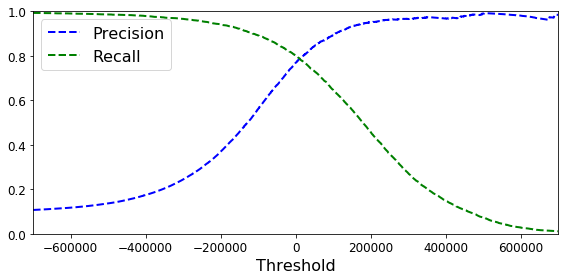

In [48]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds,precisions[:-1], "b--", label = "Precision", linewidth=2)
    plt.plot(thresholds,recalls[:-1], "g--", label = "Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
save_fig("precision_recall_vs_threshold_plot")
plt.show()

In [49]:
(y_train_pred == (y_scores > 0)).all()

True

If we aim 90% precision, we can see threshold hould be more than 70000 from above figure

In [50]:
y_train_pred_90 = (y_scores > 70000)

In [51]:
precision_score(y_train_5, y_train_pred_90)

0.8659205116491548

In [52]:
recall_score(y_train_5, y_train_pred_90)

0.6993174691016417

Saving Figure precision_vs_recall_plot


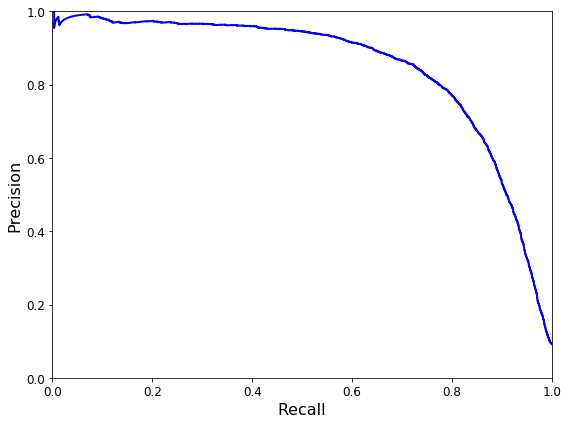

In [53]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

## The ROC Curve

In [54]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)

Saving Figure roc_curve_plot


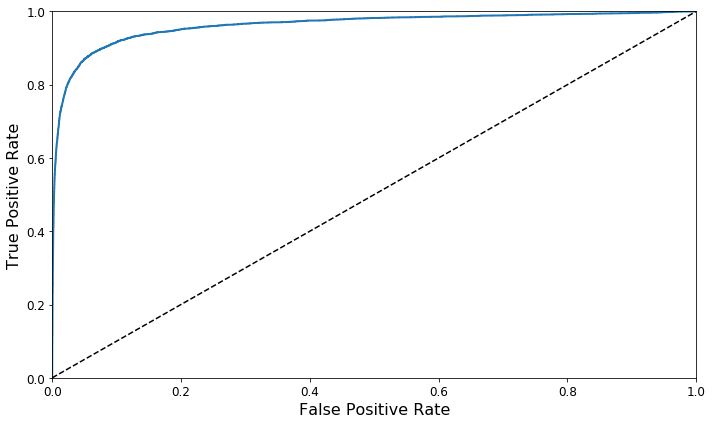

In [55]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate",fontsize=16)
    plt.ylabel("True Positive Rate",fontsize=16)
    
plt.figure(figsize=(10,6))
plot_roc_curve(fpr,tpr)
save_fig("roc_curve_plot")
plt.show()

A good classifier stays away from the dotted line in the above plot.

To compare classifiers, we can measure auc. we can check roc auc score for the same.

In [56]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9624496555967156

Let's train a RandomForestClassifier and compare its roc curve and roc auc score to SGDClassifier.

In [57]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10,random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                   method = 'predict_proba')

In [58]:
y_probas_forest[:]

array([[1. , 0. ],
       [0.9, 0.1],
       [1. , 0. ],
       ...,
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ]])

In [59]:
y_scores_forest = y_probas_forest[:,1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

Saving Figure roc_curve_comparison_plot


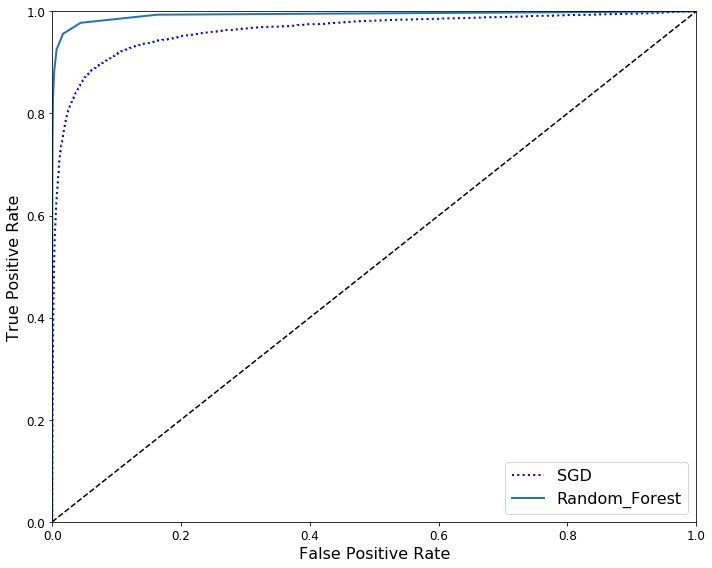

In [60]:
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,"b:",linewidth=2,label="SGD")
plot_roc_curve(fpr_forest,tpr_forest,"Random_Forest")
plt.legend(loc="lower right",fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [61]:
roc_auc_score(y_train_5,y_scores_forest)

0.9931243366003829

In [62]:
y_train_pred_forest=cross_val_predict(forest_clf,X_train,y_train_5,cv=3)

In [63]:
precision_score(y_train_5,y_train_pred_forest)

0.9852973447443494

In [64]:
recall_score(y_train_5,y_train_pred_forest)

0.8282604685482383

# MultiClass Classification

In [65]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([5], dtype=int8)

In [66]:
some_digit_scores=sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-311402.62954431, -363517.28355739, -446449.5306454 ,
        -183226.61023518, -414337.15339485,  161855.74572176,
        -452576.39616343, -471957.14962573, -518542.33997148,
        -536774.63961222]])

In [67]:
np.argmax(some_digit_scores)

5

In [68]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [69]:
sgd_clf.classes_[5]

5

## OneVsOneClassifier

In [70]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, tol = -np.infty, random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

array([5], dtype=int8)

In [71]:
len(ovo_clf.estimators_)

45

In [72]:
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])

array([5], dtype=int8)

In [73]:
forest_clf.predict_proba([some_digit])

array([[0.1, 0. , 0. , 0.1, 0. , 0.8, 0. , 0. , 0. , 0. ]])

In [74]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.84063187, 0.84899245, 0.86652998])

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled,y_train, cv=3, scoring="accuracy")

array([0.91011798, 0.90874544, 0.906636  ])

# Error Analysis

In [76]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5725,    3,   24,    9,   10,   49,   50,   10,   39,    4],
       [   2, 6493,   43,   25,    7,   40,    5,   10,  109,    8],
       [  51,   41, 5321,  104,   89,   26,   87,   60,  166,   13],
       [  47,   46,  141, 5342,    1,  231,   40,   50,  141,   92],
       [  19,   29,   41,   10, 5366,    9,   56,   37,   86,  189],
       [  73,   45,   36,  193,   64, 4582,  111,   30,  193,   94],
       [  29,   34,   44,    2,   42,   85, 5627,   10,   45,    0],
       [  25,   24,   74,   32,   54,   12,    6, 5787,   15,  236],
       [  52,  161,   73,  156,   10,  163,   61,   25, 5027,  123],
       [  43,   35,   26,   92,  178,   28,    2,  223,   82, 5240]],
      dtype=int64)

In [77]:
def plot_confusion_matrix(matrix):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving Figure confusion_matrix_plot


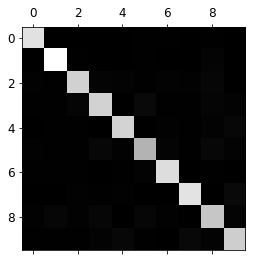

In [79]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

Let's focus the plot only on errors. First, you need to divide each value in the confusion martix by the number of images in the corresponding class.

In [81]:
row_sums=conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx=conf_mx / row_sums

Now, let's fill the diagonal with zeros to keep only errors and plot the resul:

Saving Figure confusion_matrix_errors_plot


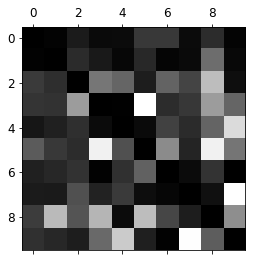

In [83]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_errors_plot", tight_layout=False)
plt.show()

Rows/Columns that are Darker (row 1) are classified correctly. Rows/Columns which are bright (row/column 8/9) are misclassified.

In [85]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

Saving Figure error_analysis_digits_plot


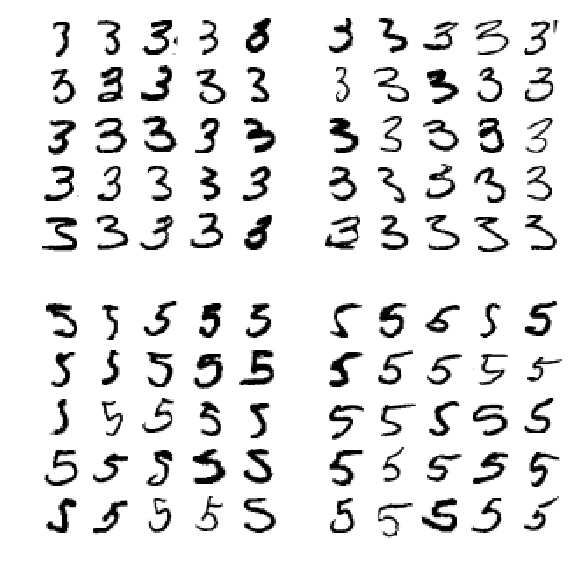

In [93]:
plt.figure(figsize=(8,8))
plt.subplot(221)
plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222)
plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223)
plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224)
plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

# MultiLabel Classification

In [95]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

In [96]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [97]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [100]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.97709078477525

# Multioutput Classification

In [102]:
noise = np.random.randint(0,100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

Saving Figure noisy_digit_example_plot


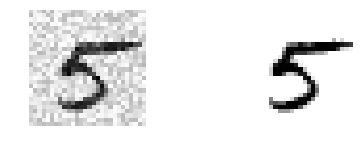

In [103]:
some_index = 5500
plt.subplot(221)
plot_digit(X_test_mod[some_index])
plt.subplot(222)
plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

Saving Figure cleaned_digit_example_plot


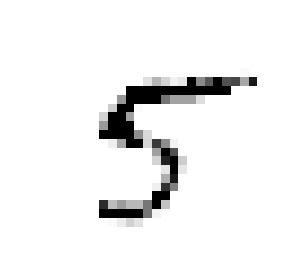

In [104]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")